# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 45: Nested Clustered Optimization (NCO) Portfolio Optimization with Constraints

## 1. Downloading the data:

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [3]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5784%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6403%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3838%,-0.1116%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1693%,-1.6851%,-1.0215%,0.0914%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0331%,...,1.6435%,0.0000%,0.9869%,-0.1451%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5799%,-1.9919%


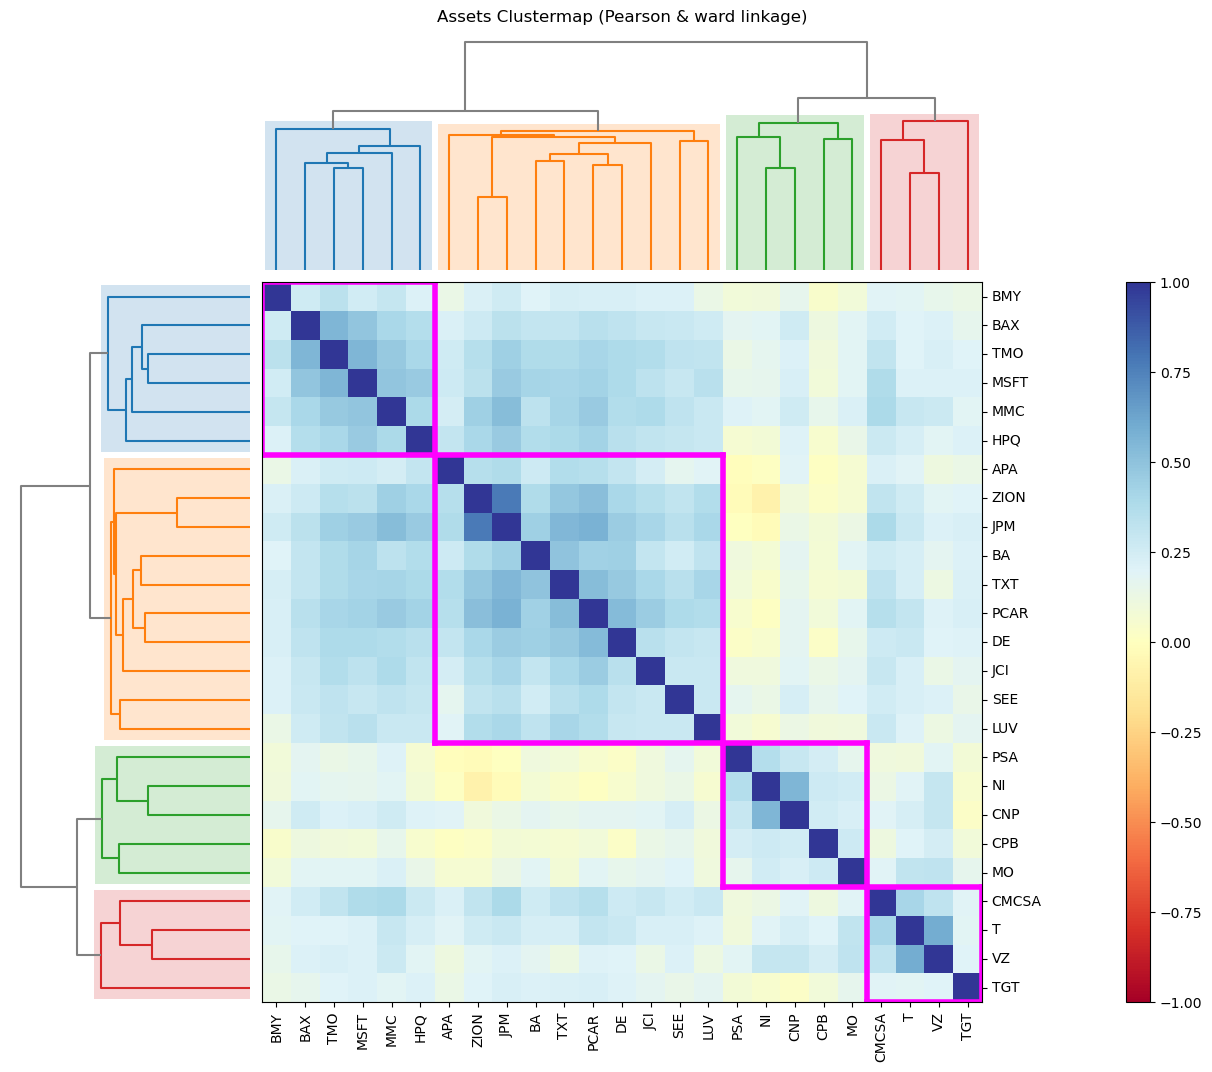

In [4]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

The graph above suggest that optimal number of clusters are four.

## 2. Estimating NCO Portfolio

This is the original model proposed by López de Prado (2019). Riskfolio-Lib expand this model to 13 risk measures and for objective functions: "Minimize Risk", "Maximize Utility Function", "Maximize Return/Risk Ratio" and "Equal Risk Contribution".

### 2.1 Calculating the NCO portfolio

In [6]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='NCO' # Could be HRP, HERC or NCO
codependence = 'pearson' # Correlation matrix used to group assets in clusters
method_cov = 'hist' # Covariance estimation technique
obj = "MinRisk" # Posible values are "MinRisk", "Utility", "Sharpe" and "ERC"
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
l = 2 # Risk aversion factor, only usefull with "Utility" objective
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      method_cov=method_cov,
                      obj=obj,
                      rm=rm,
                      rf=rf,
                      l=l,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,1.1729%,5.1828%,2.8237%,5.0010%,10.9746%,3.7074%,0.7664%,0.3470%,2.4531%,...,7.0044%,0.1994%,12.0258%,2.2921%,4.8851%,3.0259%,1.1105%,0.0000%,8.6247%,0.0000%


### 2.2 Plotting portfolio composition

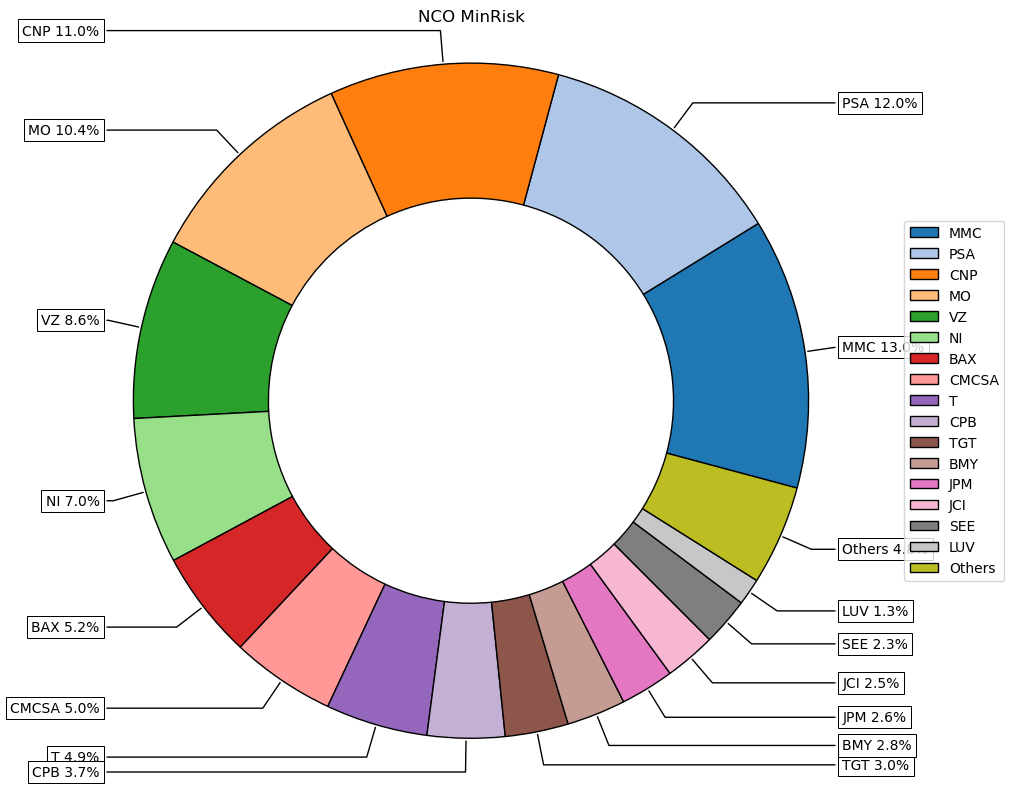

In [8]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='NCO MinRisk',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

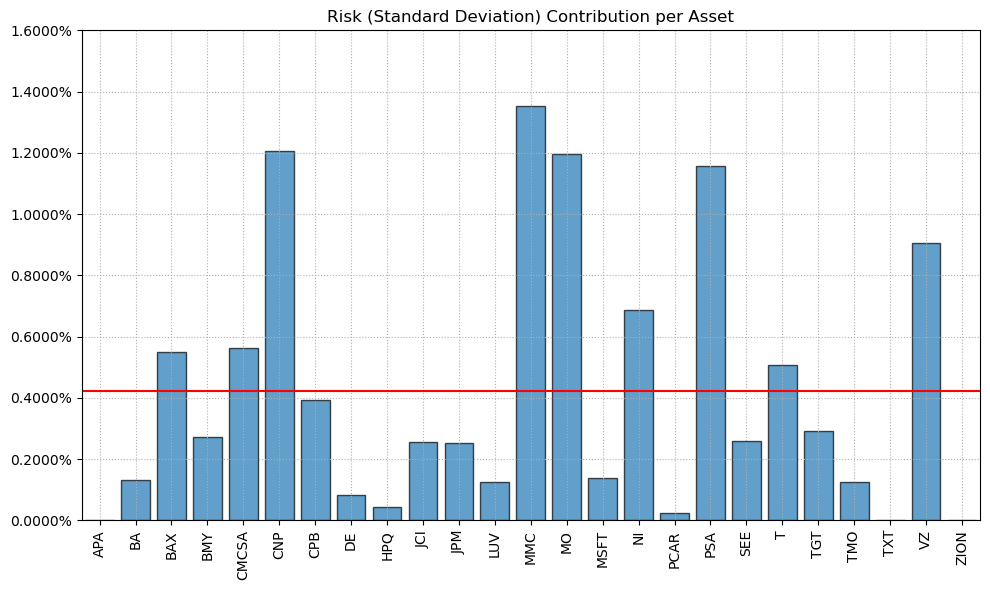

In [10]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

## 3. Estimating NCO Portfolio with Constraints

This is a modification of NCO based on the model proposed by Johann Pfitzinger & Nico Katzke (2019).

### 3.1 Building the NCO portfolio constraints

In [12]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['Assets', 'Assets', 'All Assets', 
                        'Each asset in a class', 'Each asset in a class'],
               'Set': ['', '', '','Industry', 'Industry'],
               'Position': ['HPQ', 'PSA', '', 'Financials', 'Information Technology'],
               'Sign': ['>=', '<=', '<=', '<=', '<='],
               'Weight': [0.01, 0.05, 0.06, 0.04, 0.02]}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight
0,False,Assets,,HPQ,>=,1.0000%
1,False,Assets,,PSA,<=,5.0000%
2,False,All Assets,,,<=,6.0000%
3,False,Each asset in a class,Industry,Financials,<=,4.0000%
4,False,Each asset in a class,Industry,Information Technology,<=,2.0000%


### 3.2 Calculating the NCO portfolio with constraints

In [14]:
# Estimate optimal portfolio with constraints:

w_max, w_min = rp.hrp_constraints(constraints, asset_classes)

port.w_max = w_max
port.w_min = w_min

w_1 = port.optimization(model=model,
                        codependence=codependence,
                        method_cov=method_cov,
                        obj=obj,
                        rm=rm,
                        rf=rf,
                        l=l,
                        linkage=linkage,
                        max_k=max_k,
                        leaf_order=leaf_order)

display(w_1.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,3.3666%,6.0000%,6.0000%,6.0000%,6.0000%,6.0000%,2.1997%,1.0000%,6.0000%,...,6.0000%,0.5722%,4.0000%,6.0000%,6.0000%,6.0000%,3.1874%,0.0000%,6.0000%,0.0000%


### 3.3 Plotting portfolio composition

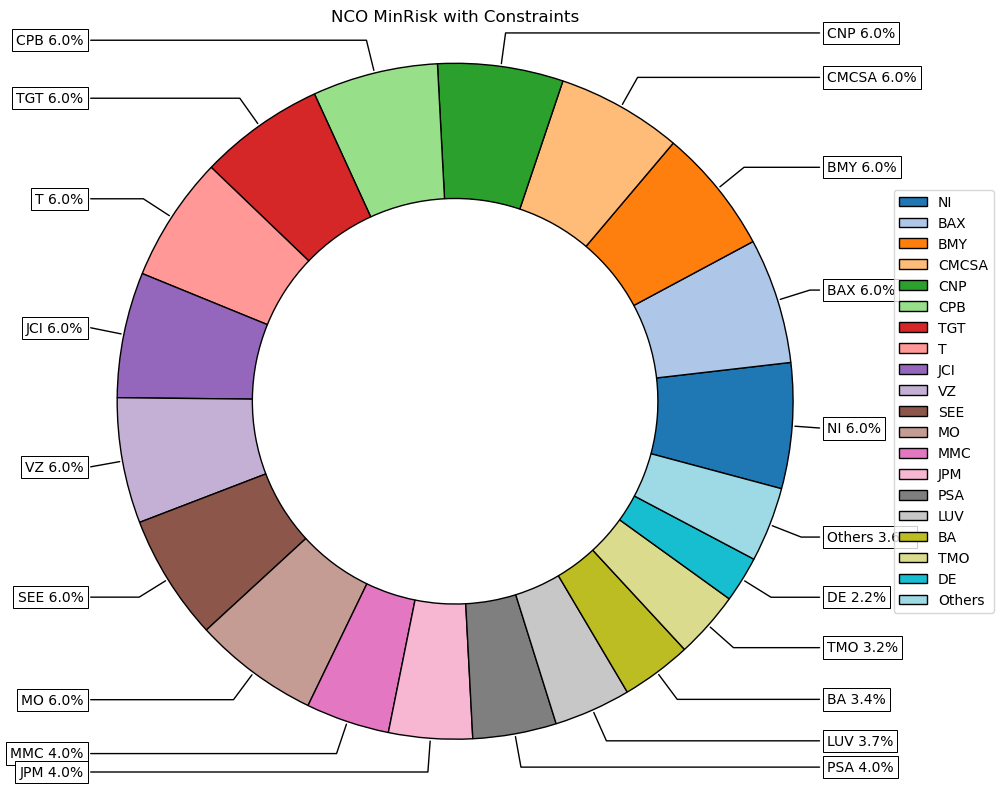

In [16]:
# Plotting the composition of the portfolio with constraints

ax = rp.plot_pie(w=w_1,
                 title='NCO MinRisk with Constraints',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 3.4 Plotting Risk Contribution

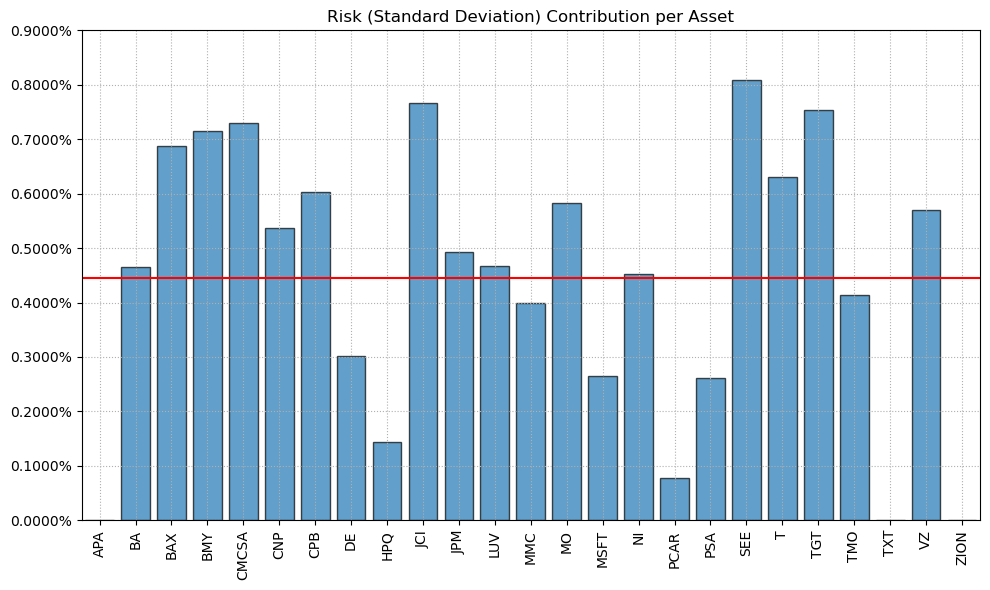

In [18]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w_1,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)